# Libraries 


In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading the dataset 


In [29]:
data=pd.read_excel("C:/Users/kiran/Downloads/Online Retail.xlsx")
data.head()

In [4]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Data preparation 


In [5]:
#Cheacking for null values 

data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#dropping the null values from the dataset 
data=data.dropna()

In [7]:
#Removing duplicates from the dataset 
data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
#Removing the negative values from the dataset 
data= data[(data['Quantity'] >= 0) & (data['UnitPrice'] >= 0)]


In [9]:
#Dataset Description 
data.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [11]:
#Descritpive stats about selected columns 
columns=['Quantity','UnitPrice']
for i in columns:
    a=data[i].describe()
    print('Descriptive statistics about: ',i)
    print(a)

Descriptive statistics about:  Quantity
count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64
Descriptive statistics about:  UnitPrice
count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


In [26]:
#Removing outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)     
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[~((data[column] < lower_bound) | (data[column] > upper_bound))]



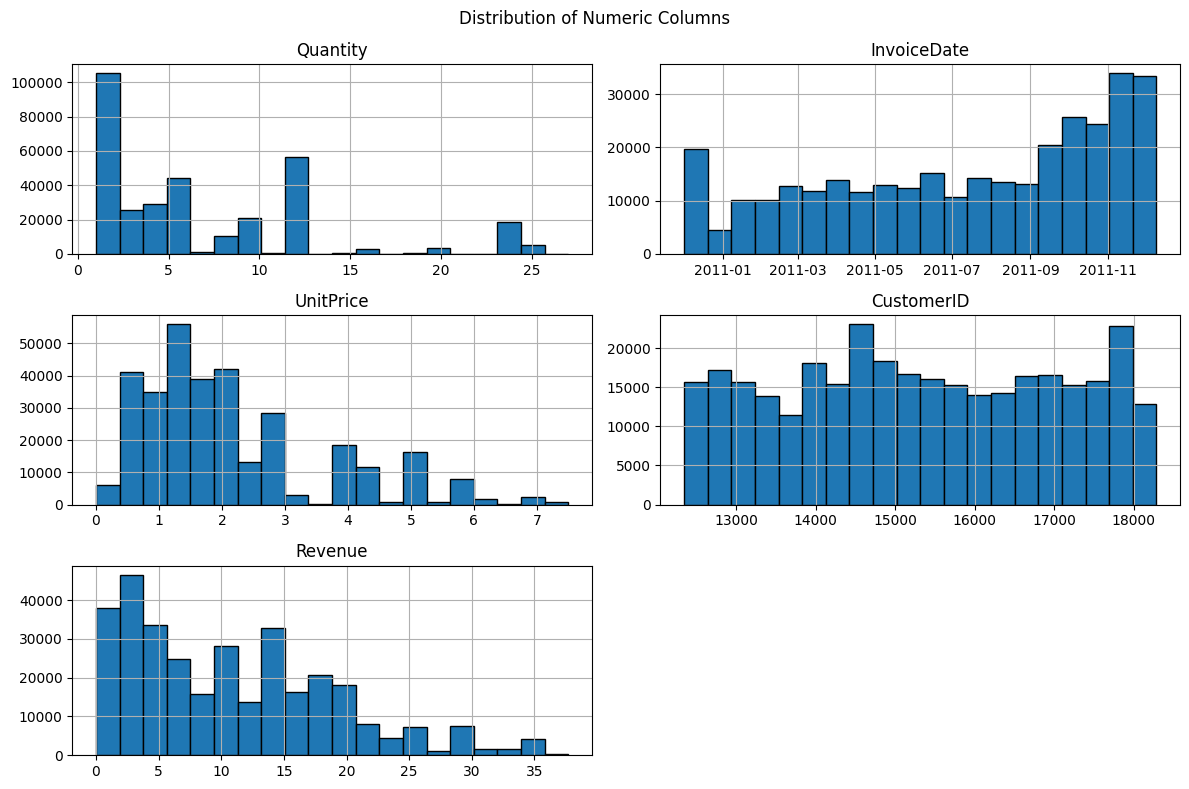

In [27]:
data.hist(figsize=(12, 8), bins=20, edgecolor='black')

plt.suptitle('Distribution of Numeric Columns')
plt.tight_layout()
plt.show()

# EDA

                             Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
1762             JUMBO BAG RED RETROSPOT     46181
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725
216        ASSORTED COLOUR BIRD ORNAMENT     35362
2269     PACK OF 72 RETROSPOT CAKE CASES     33693
2600                      POPCORN HOLDER     30931
2656                  RABBIT NIGHT LIGHT     27202
2047             MINI PAINT SET VINTAGE      26076


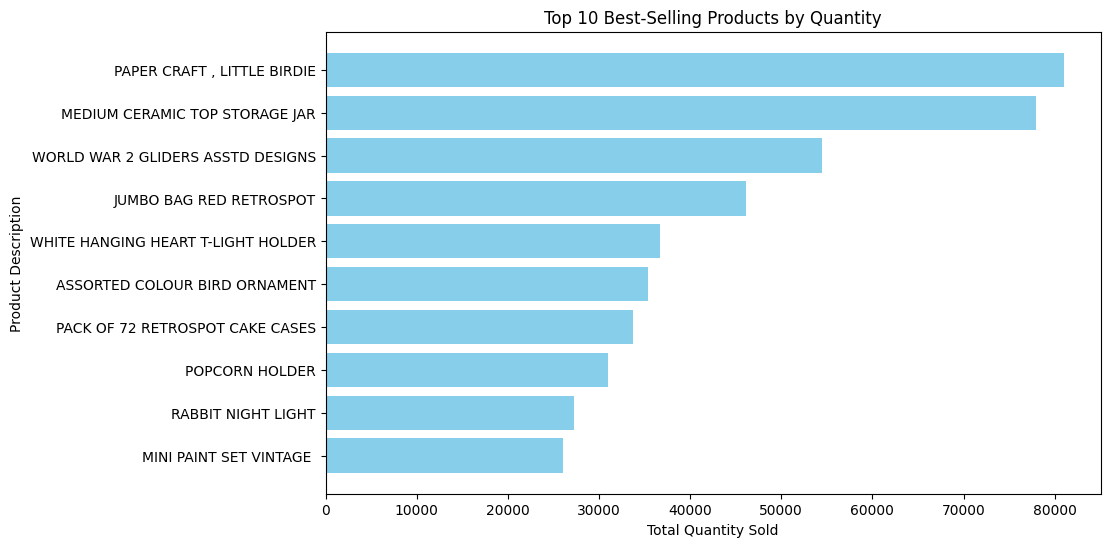

In [12]:
#Top 10 best selling products 

sales=data.groupby('Description')['Quantity'].sum().reset_index()
top_10_products=sales.sort_values(by='Quantity', ascending=False).head(10)
print(top_10_products)



#Graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.gca().invert_yaxis()  
plt.show()


                             Description     Revenue
2319         PAPER CRAFT , LITTLE BIRDIE  168469.600
2767            REGENCY CAKESTAND 3 TIER  142592.950
3698  WHITE HANGING HEART T-LIGHT HOLDER  100448.150
1762             JUMBO BAG RED RETROSPOT   85220.780
1992      MEDIUM CERAMIC TOP STORAGE JAR   81416.730
...                                  ...         ...
2639          PURPLE FRANGIPANI HAIRCLIP       0.850
3556            VINTAGE BLUE TINSEL REEL       0.840
2933     SET 12 COLOURING PENCILS DOILEY       0.650
1628           HEN HOUSE W CHICK IN NEST       0.420
2275          PADS TO MATCH ALL CUSHIONS       0.003

[3877 rows x 2 columns]


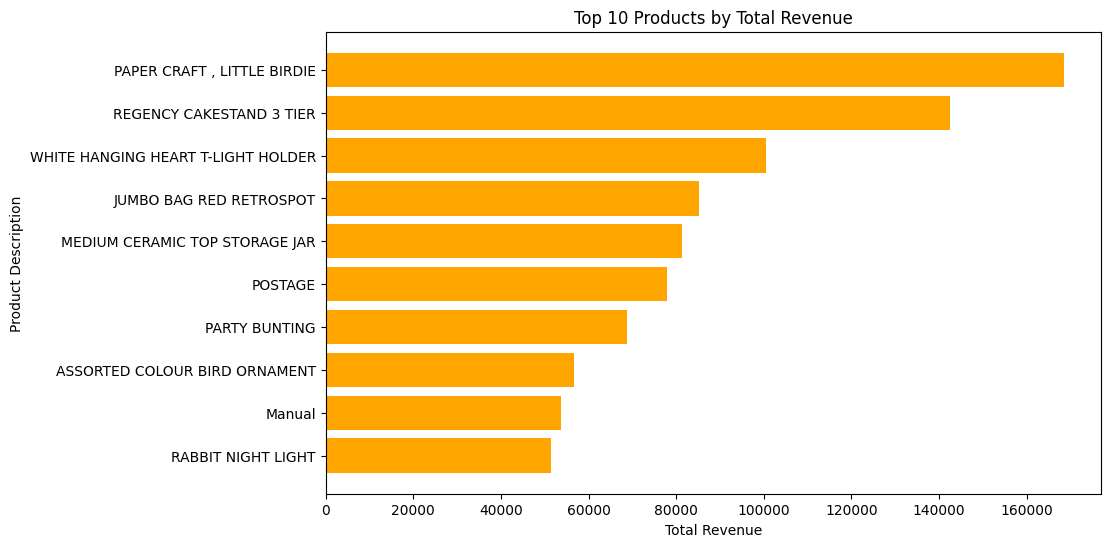

In [13]:
#Revenue generated by each product 
data['Revenue'] = data['Quantity'] * data['UnitPrice']



revenue=data.groupby('Description')['Revenue'].sum().reset_index()
revenue=revenue.sort_values(by='Revenue', ascending=False)
print(revenue)



#Graph 
top_10_revenue_products=revenue.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_revenue_products['Description'], top_10_revenue_products['Revenue'], color='orange')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Total Revenue')
plt.gca().invert_yaxis() 
plt.show()



   YearMonth      Revenue
0    2010-12   572713.890
1    2011-01   569445.040
2    2011-02   447137.350
3    2011-03   595500.760
4    2011-04   469200.361
5    2011-05   678594.560
6    2011-06   661213.690
7    2011-07   600091.011
8    2011-08   645343.900
9    2011-09   952838.382
10   2011-10  1039318.790
11   2011-11  1161817.380
12   2011-12   518192.790


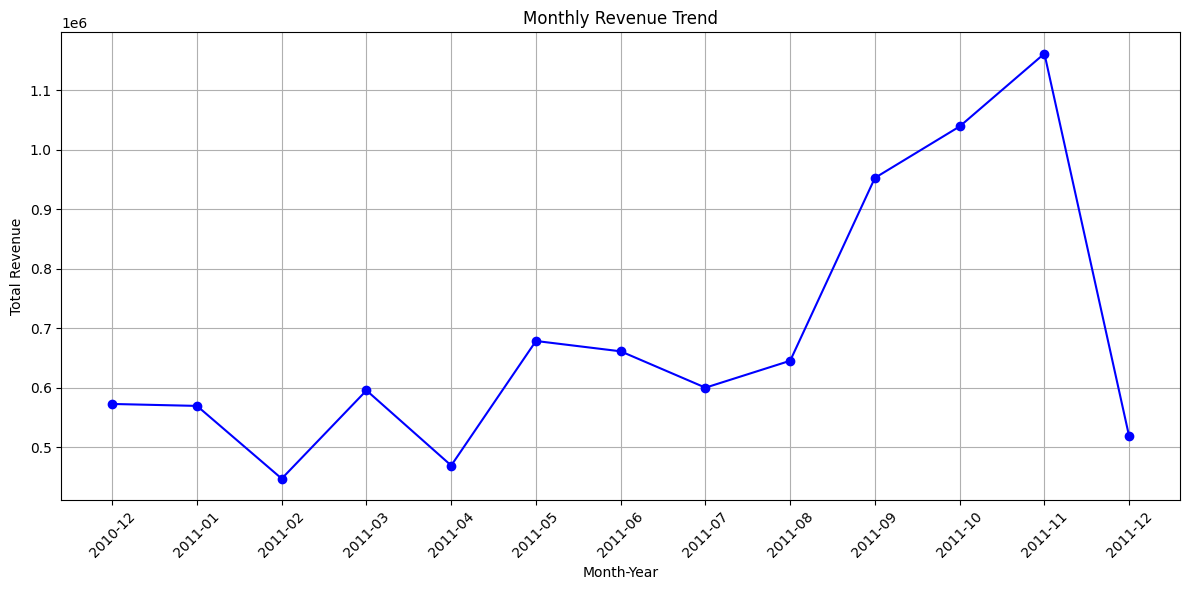

In [14]:
#Monthly revenue trend


data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['Revenue']=data['Quantity'] * data['UnitPrice']
data['YearMonth']=data['InvoiceDate'].dt.to_period('M')
monthly_revenue=data.groupby('YearMonth')['Revenue'].sum().reset_index()
print(monthly_revenue)




# Graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['YearMonth'].astype(str), monthly_revenue['Revenue'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)  
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.grid(True)
plt.tight_layout()
plt.show()


# Customer Behaviour

Number of unique customers: 4339
Number of repeat customers: 4267
Percentage of sales driven by repeat customers: 98.90%


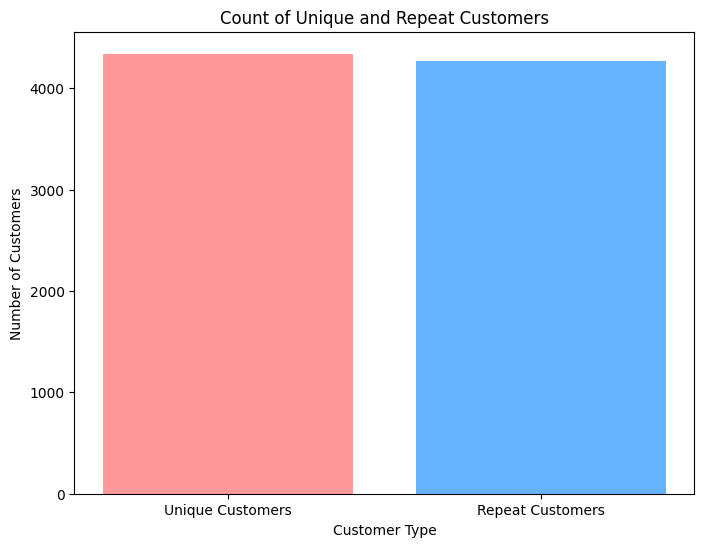

In [15]:
# Count the number of new customers
new_cust=data['CustomerID'].nunique()
print(f"Number of unique customers: {new_cust}")
# Repeat Customers
repeat_cust=data['CustomerID'].value_counts()[data['CustomerID'].value_counts() > 1].count()
print(f"Number of repeat customers: {repeat_cust}")

#extracting the ids of the repeat customers
repeat_customer_ids = data['CustomerID'].value_counts()[data['CustomerID'].value_counts() > 1].index
repeat_customer_sales = data[data['CustomerID'].isin(repeat_customer_ids)]

# Calculate the total revenue from repeat customers
total_sales = data['Revenue'].sum()
repeat_sales = repeat_customer_sales['Revenue'].sum()

# Calculate the percentage of sales driven by repeat customers
percentage_repeat_sales = (repeat_sales / total_sales) * 100

print(f"Percentage of sales driven by repeat customers: {percentage_repeat_sales:.2f}%")

labels = ['Unique Customers', 'Repeat Customers']
sizes = [new_cust, repeat_cust]
colors = ['#ff9999', '#66b3ff']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.title('Count of Unique and Repeat Customers')
plt.show()

Average Order Value: $480.76
                 Country      Revenue
0              Australia  2430.198421
1                Austria   599.922353
2                Bahrain   274.200000
3                Belgium   420.370816
4                 Brazil  1143.600000
5                 Canada   611.063333
6        Channel Islands   786.555385
7                 Cyprus   849.398750
8         Czech Republic   413.370000
9                Denmark  1053.074444
10                  EIRE  1021.330385
11    European Community   325.062500
12               Finland   549.904390
13                France   537.336889
14               Germany   500.803370
15                Greece   952.104000
16               Iceland   615.714286
17                Israel  1444.338000
18                 Italy   460.085263
19                 Japan  1969.282632
20               Lebanon  1693.880000
21             Lithuania   415.265000
22                 Malta   545.118000
23           Netherlands  3004.698316
24                Nor

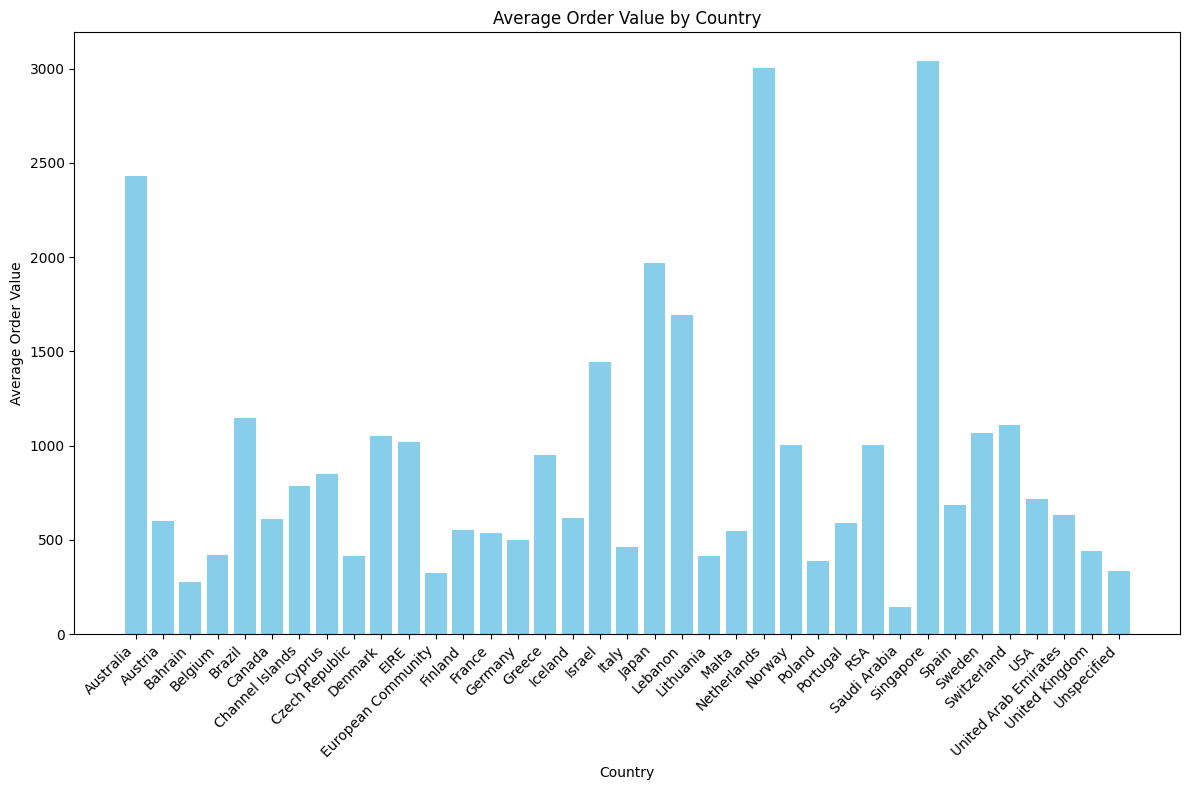

In [16]:
#AVG quantity per order/country wise segmentation 


#Calculating the avg order value 
invoice_sales = data.groupby('InvoiceNo')['Revenue'].sum().reset_index()
average_order_value = invoice_sales['Revenue'].mean()
print(f"Average Order Value: ${average_order_value:.2f}")



#AVG order value among diff customer segments 
country_invoice_sales = data.groupby(['Country', 'InvoiceNo'])['Revenue'].sum().reset_index()
average_order_value_by_country = country_invoice_sales.groupby('Country')['Revenue'].mean().reset_index()
print(average_order_value_by_country)



#Graph 
plt.figure(figsize=(12, 8))
plt.bar(average_order_value_by_country['Country'], average_order_value_by_country['Revenue'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Country')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


                 Country      Revenue
35        United Kingdom  7308391.554
23           Netherlands   285446.340
10                  EIRE   265545.900
14               Germany   228867.140
13                France   209024.050
0              Australia   138521.310
30                 Spain    61577.110
32           Switzerland    56443.950
3                Belgium    41196.340
31                Sweden    38378.330
19                 Japan    37416.370
24                Norway    36165.440
26              Portugal    33439.890
12               Finland    22546.080
29             Singapore    21279.290
6        Channel Islands    20450.440
9                Denmark    18955.340
18                 Italy    17483.240
7                 Cyprus    13590.380
1                Austria    10198.680
25                Poland     7334.650
17                Israel     7221.690
15                Greece     4760.520
16               Iceland     4310.000
5                 Canada     3666.380
33          

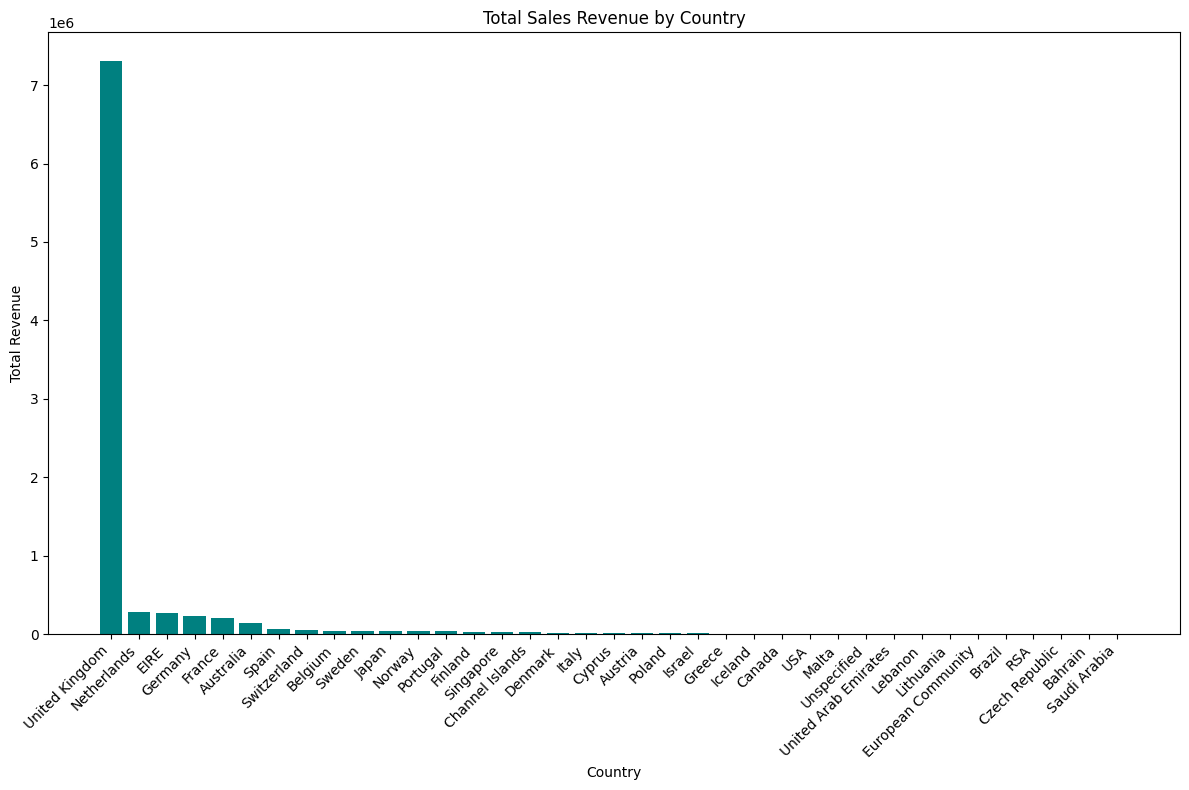

In [17]:
#Country that generates the most revenue 
revenue_by_country=data.groupby('Country')['Revenue'].sum().reset_index()
revenue_by_country=revenue_by_country.sort_values(by='Revenue', ascending=False)
print(revenue_by_country)


#Graph
plt.figure(figsize=(12, 8))
plt.bar(revenue_by_country['Country'], revenue_by_country['Revenue'], color='teal')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Sales Revenue by Country')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


# Product Performance

In [18]:
#top 5 countries with the highest average revenue per transaction
avg_rev_ptrans=data.groupby(['Country', 'InvoiceNo'])['Revenue'].sum().reset_index()
avg_rev_ptrans = avg_rev_ptrans.groupby('Country')['Revenue'].mean().reset_index()
top_countries=avg_rev_ptrans.sort_values(by='Revenue', ascending=False).head(5)

print(top_countries)


        Country      Revenue
29    Singapore  3039.898571
23  Netherlands  3004.698316
0     Australia  2430.198421
19        Japan  1969.282632
20      Lebanon  1693.880000


In [19]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# total revenue per product per month
monthly_sales = data.groupby(['MonthYear', 'Description'])['Revenue'].sum().reset_index()
pivot_sales = monthly_sales.pivot(index='MonthYear', columns='Description', values='Revenue')

# Graph
plt.figure(figsize=(12, 8))
for column in pivot_sales.columns:
    plt.plot(pivot_sales.index.astype(str), pivot_sales[column], marker='o', label=column)
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Performance by Product')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\kiran\AppData\Local\Temp\ipykernel_17572\2909457060.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\kiran\AppData\Local\Temp\ipykernel_17572\2909457060.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\kiran\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 1031x81255 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>